In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("bank.csv")
df.head(3)

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,1,227,147,111,2460,639
1,2,123,86,65,3510,436
2,3,306,149,76,2570,669


In [4]:
x=df.iloc[:,1:]
x

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,227,147,111,2460,639
1,123,86,65,3510,436
2,306,149,76,2570,669
3,251,112,129,3650,623
4,174,135,128,3400,579
...,...,...,...,...,...
510,337,140,111,2640,694
511,168,131,60,2640,524
512,333,86,108,2850,676
513,192,176,34,2760,505


# Pre-processing

In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   DD                   515 non-null    int64
 1   Withdrawals          515 non-null    int64
 2   Deposits             515 non-null    int64
 3   Branch Area in sqft  515 non-null    int64
 4   avg daily walkins    515 non-null    int64
dtypes: int64(5)
memory usage: 20.2 KB


In [8]:
x.isnull().sum()

DD                     0
Withdrawals            0
Deposits               0
Branch Area in sqft    0
avg daily walkins      0
dtype: int64

In [15]:
x.describe()

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,515.000000,515.000000,515.000000,515.000000,515.000000
mean,232.252427,150.693204,81.687379,2934.669903,598.603883
std,66.648815,56.897777,28.596912,437.062831,83.487891
min,120.000000,10.000000,33.000000,1200.000000,380.000000
25%,169.500000,103.000000,58.000000,2675.000000,537.500000
50%,237.000000,152.000000,80.000000,2960.000000,601.000000
75%,291.000000,200.000000,105.000000,3300.000000,657.500000
max,350.000000,247.000000,212.000000,3650.000000,838.000000


In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
sc_x=pd.DataFrame(sc_x,columns=x.columns)
sc_x

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
0,-0.078884,-0.064973,1.026024,-1.087101,0.484326
1,-1.640819,-1.138113,-0.584105,1.317635,-1.949528
2,1.107586,-0.029788,-0.199074,-0.835176,0.844009
3,0.281562,-0.680709,1.656075,1.638267,0.292496
4,-0.874870,-0.276082,1.621072,1.065711,-0.235039
...,...,...,...,...,...
510,1.573163,-0.188120,1.026024,-0.674860,1.143745
511,-0.964982,-0.346452,-0.759119,-0.674860,-0.894458
512,1.513088,-1.138113,0.921016,-0.193913,0.927935
513,-0.604535,0.445209,-1.669192,-0.400033,-1.122257


### Pre Processing Ends Here. 

1. No null observations
2. No outliers...we can see mean and median are nearly same...plus the max range is also not very high. 
3. As it is clustering problem, no imbalance check required
4. All features are int, so no encoding required as well. 
5. Only feature Scaling was required and is done. 

# Clustering Process Starts

In [20]:
from sklearn.cluster import KMeans

In [24]:
# 1. Elbow Method

wcss=[]

for i in range(2,15):
    kmeans=KMeans(n_clusters=i)
    y_pred = kmeans.fit(x)
    wcss.append(y_pred.inertia_)
    
abc=[1,2,3,4,5,6,7,8,9,10,11,12,13]

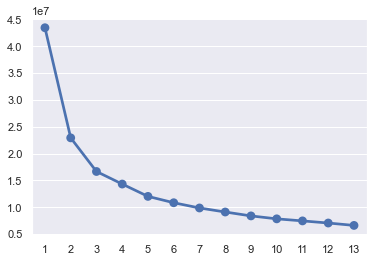

In [26]:
sns.pointplot(abc,wcss)
plt.show()

In [115]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(x)
y_pred=kmeans.fit_predict(x)
y_pred

array([4, 3, 4, 3, 3, 3, 0, 2, 1, 2, 4, 4, 2, 3, 2, 3, 2, 4, 4, 2, 2, 3,
       3, 1, 0, 2, 3, 2, 4, 4, 4, 1, 2, 2, 3, 2, 2, 2, 4, 0, 0, 2, 3, 2,
       2, 1, 1, 3, 4, 0, 3, 2, 2, 4, 3, 1, 3, 4, 0, 0, 0, 2, 3, 4, 4, 2,
       2, 1, 2, 4, 4, 1, 4, 4, 3, 0, 0, 0, 2, 4, 2, 2, 2, 3, 3, 2, 2, 3,
       3, 2, 4, 0, 1, 0, 0, 2, 2, 4, 3, 0, 3, 4, 2, 2, 1, 2, 2, 2, 4, 0,
       4, 0, 0, 3, 1, 2, 0, 2, 0, 0, 2, 0, 3, 0, 4, 2, 2, 3, 0, 2, 4, 4,
       4, 2, 1, 4, 3, 2, 1, 4, 0, 0, 0, 1, 4, 2, 4, 2, 1, 0, 2, 1, 4, 0,
       4, 2, 4, 2, 2, 2, 0, 1, 4, 4, 1, 0, 0, 2, 1, 3, 2, 3, 2, 4, 4, 2,
       1, 4, 1, 1, 3, 0, 0, 3, 4, 3, 2, 4, 3, 4, 0, 2, 0, 2, 1, 0, 4, 4,
       2, 2, 3, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2, 0, 3, 0, 3, 2, 3, 2, 0, 2,
       0, 0, 2, 2, 1, 4, 0, 0, 2, 3, 3, 4, 2, 2, 4, 1, 0, 0, 0, 0, 2, 2,
       1, 0, 1, 4, 0, 3, 2, 0, 2, 4, 3, 4, 3, 2, 2, 0, 4, 4, 1, 3, 0, 2,
       3, 2, 1, 2, 4, 2, 2, 0, 4, 2, 4, 4, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4,
       4, 1, 2, 3, 3, 4, 4, 3, 4, 2, 1, 3, 2, 1, 4,

In [116]:
all_data=pd.concat([df,pd.DataFrame(y_pred)],axis=1)

In [117]:
all_data.rename(columns={0:'Clusters'},inplace=True)

In [118]:
all_data.head(1)

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,Clusters
0,1,227,147,111,2460,639,4


<AxesSubplot:xlabel='Clusters', ylabel='DD'>

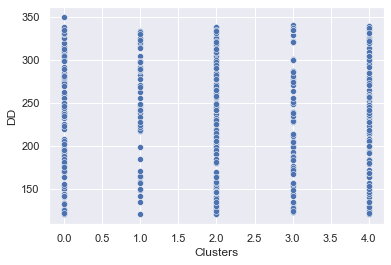

In [119]:
sns.scatterplot(all_data['Clusters'],all_data['DD'])

<AxesSubplot:ylabel='Clusters'>

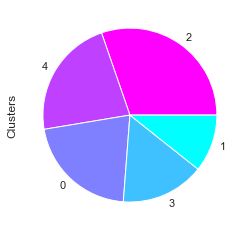

In [120]:
all_data['Clusters'].value_counts().plot(kind='pie',cmap='cool_r')

<AxesSubplot:xlabel='Clusters'>

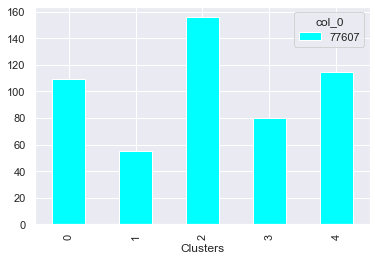

In [121]:
pd.crosstab(all_data['Clusters'],all_data['Withdrawals'].sum()).plot(kind='bar',cmap = 'cool')

<AxesSubplot:xlabel='Clusters'>

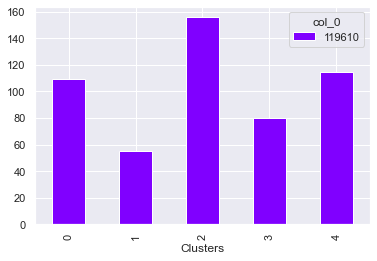

In [122]:
pd.crosstab(all_data['Clusters'],all_data['DD'].sum()).plot(kind='bar',cmap = 'rainbow')

<AxesSubplot:xlabel='Clusters'>

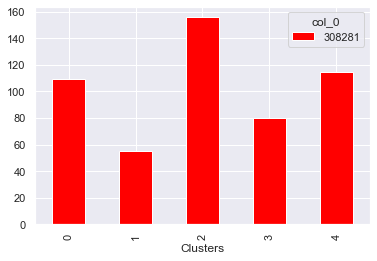

In [123]:
pd.crosstab(all_data['Clusters'],all_data['avg daily walkins'].sum()).plot(kind='bar',cmap = 'rainbow_r')

<AxesSubplot:xlabel='Clusters'>

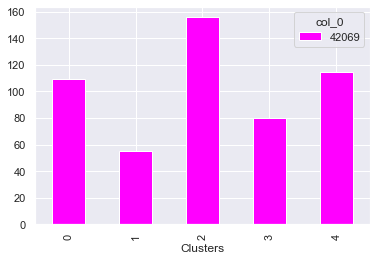

In [124]:
pd.crosstab(all_data['Clusters'],all_data['Deposits'].sum()).plot(kind='bar',cmap = 'cool_r')

<AxesSubplot:xlabel='Clusters'>

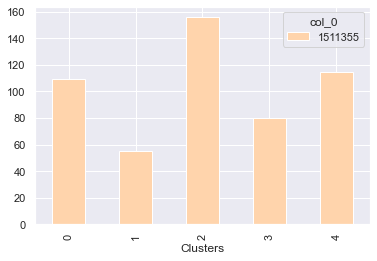

In [125]:
pd.crosstab(all_data['Clusters'],all_data['Branch Area in sqft'].sum()).plot(kind='bar',cmap = 'icefire_r')

<AxesSubplot:xlabel='Clusters'>

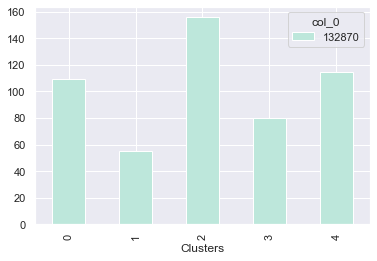

In [126]:
pd.crosstab(all_data['Clusters'],all_data['Bank'].sum()).plot(kind='bar',cmap = 'icefire')

# OBESERVATIONS

1. In all the features/factors, cluster 2 seem to be excelling. 
2. Reason may be that it has many banks associated with it. 
3. It excels in all features.